##### Dataset: "https://archive.ics.uci.edu/dataset/502/online+retail+ii"

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_excel("online_retail_II.xlsx")
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


### 1. Basic Inspection
Load the dataset and show:

Shape (rows & columns)

Column data types

Number of unique invoices and products



In [15]:
df.shape

(525461, 8)

In [17]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [29]:
df['Invoice'].nunique()

28816

In [31]:
df['Description'].nunique()

4681

### 2. Missing Values
Identify columns with missing values.

Drop rows where InvoiceNo, StockCode, or Quantity is missing.

For Customer ID, how many records are missing? What % of total?

In [34]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [44]:
Customer_Id_missing_percentage = round((df['Customer ID'].isnull().sum())/len(df) * 100.0,2)
Customer_Id_missing_percentage

20.54

### 3. Data Type Conversion
Convert InvoiceDate to datetime format.

Extract new columns: InvoiceYear, InvoiceMonth, InvoiceDay, and InvoiceHour.

In [66]:
df['InvoiceDate'].dtype

dtype('<M8[ns]')

In [68]:
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceDay'] = df['InvoiceDate'].dt.day
df['InvoiceHour'] = df['InvoiceDate'].dt.hour

### 4. Basic EDA
Find total number of transactions per year.

What are the top 5 selling products by quantity?

Which country has the highest total revenue (excluding UK)?

In [77]:
transactions_count = df.groupby('InvoiceYear').size().reset_index(name = 'transaction_count')
transactions_count

,InvoiceYear,transaction_count
0,2009,45228
1,2010,480233


In [93]:
Top_selling_product = df.groupby('Description')['Quantity'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False).head(5)
Top_selling_product

,Description,count
4402,WHITE HANGING HEART T-LIGHT HOLDER,3549
3371,REGENCY CAKESTAND 3 TIER,2212
4067,STRAWBERRY CERAMIC TRINKET BOX,1843
2744,PACK OF 72 RETRO SPOT CAKE CASES,1466
279,ASSORTED COLOUR BIRD ORNAMENT,1457


In [99]:
df['Revenue'] = df['Quantity'] * df['Price']

In [119]:
df_no_uk = df[df['Country'] != "United Kingdom"]

In [129]:
df_no_uk.groupby('Country')['Revenue'].sum().reset_index(name = 'Total_revenue').sort_values(by = 'Total_revenue', ascending = False).head(1)

,Country,Total_revenue
10,EIRE,352242.73


### 5. Revenue Feature Engineering
Create a new column TotalPrice = Quantity * Price.

What is the average order value (AOV) for each country?

What is the monthly revenue trend for 2010? Visualize it using a line plot.

In [132]:
df['TotalPrice'] = df['Quantity'] * df['Price']

In [138]:
AOV_country = df.groupby('Country')['TotalPrice'].mean().reset_index(name = 'AOV').sort_values(by = 'AOV', ascending = False)
AOV_country

,Country,AOV
9,Denmark,109.749883
24,Netherlands,95.291950
32,Sweden,56.777727
15,Hong Kong,51.608684
0,Australia,45.950765
17,Israel,43.235135
34,Thailand,40.401842
19,Japan,37.660536
4,Bermuda,36.857059
33,Switzerland,36.515088


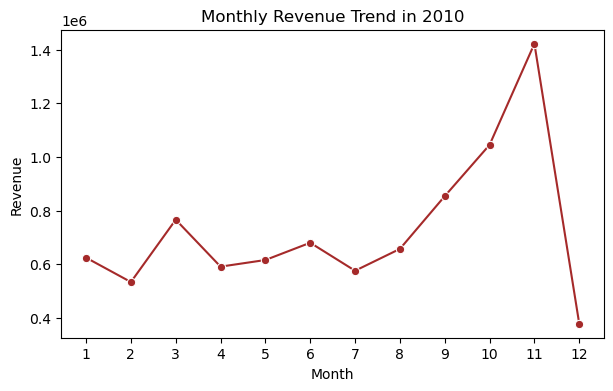

In [160]:
df_2010 = df[df['InvoiceYear'] == 2010]

Monthly_trend_2010 = df_2010.groupby('InvoiceMonth')['Revenue'].sum().reset_index(name = 'Revenue')

plt.figure(figsize = (7,4))
sns.lineplot(data = Monthly_trend_2010, x = 'InvoiceMonth', y = 'Revenue', color = 'brown', marker = 'o')
plt.title('Monthly Revenue Trend in 2010')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(range(1, 13))
plt.show()

### 6. Order Behavior
How many invoices are credit notes (i.e., InvoiceNo starts with 'C')?

What is the average basket size (number of items per invoice)?

What are the top 3 customers by total spend (ignore null customer IDs)?

In [173]:
df['Invoice'] = df['Invoice'].astype(str)
credit_note_count  = df[df['Invoice'].str.startswith('C')]['Invoice'].nunique()
credit_note_count 

4592

In [183]:
basket_size = df.groupby('Invoice')['Quantity'].sum().reset_index(name = 'basket_size')
basket_size

,Invoice,basket_size
0,489434,166
1,489435,60
2,489436,193
3,489437,145
4,489438,826
...,...,...
28811,C538121,-1
28812,C538122,-1
28813,C538123,-4
28814,C538124,-6


In [199]:
df_not_null_cust = df[df['Customer ID'].notna()]

top_3_cust = df_not_null_cust.groupby('Customer ID')['Revenue'].sum().reset_index(name = 'Total Spend').sort_values(by = 'Total Spend', ascending = False).head(3)
top_3_cust

,Customer ID,Total Spend
4254,18102.0,341776.73
1662,14646.0,243853.05
1291,14156.0,183180.55
